# Exercício 2 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100000 amostras

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [16]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9544467329978943, 4.561951039938946e-17)

In [17]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/SecondMixture100000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2
0 -2.299740  3.516050 -2.340229
1  0.522315 -1.223329  4.197480
2  1.030031 -3.576781  3.640578
3 -2.574677 -1.459360  1.500856
4 -1.876630  3.304482 -3.478313


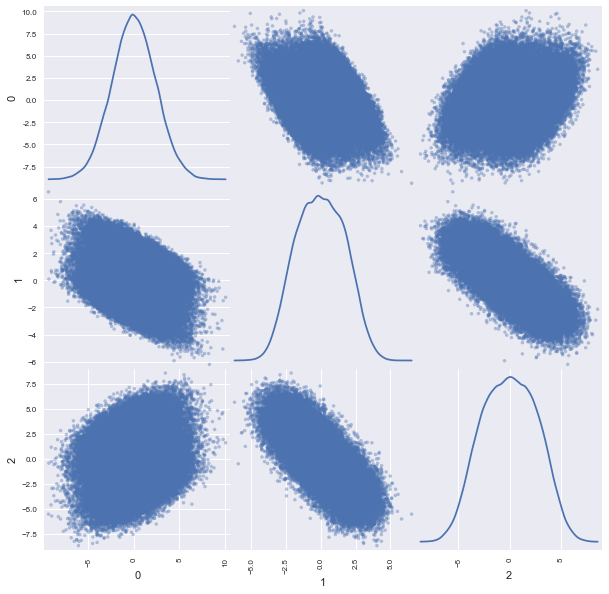

In [18]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [19]:
resultsTable(mixtures)

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.1039,1,0.25534
1,0,0.189,0.994,0
2,0,0.1108,0.9934,0


## NPCA-RLS Algorithm

In [20]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, beta = 0.9998, runs = 1)

Execution time: 7.8479719161987305 seconds


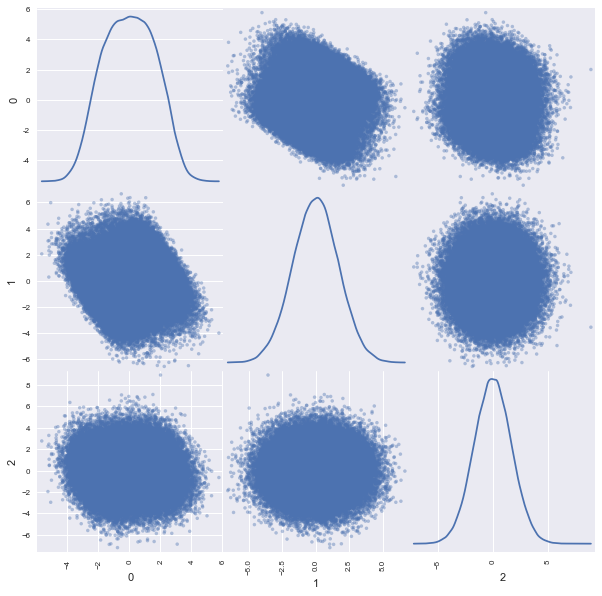

In [21]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.097,0.9923,0
1,0,0.0211,0.9999,0.093662
2,0.0864,0.2019,1,0.43278


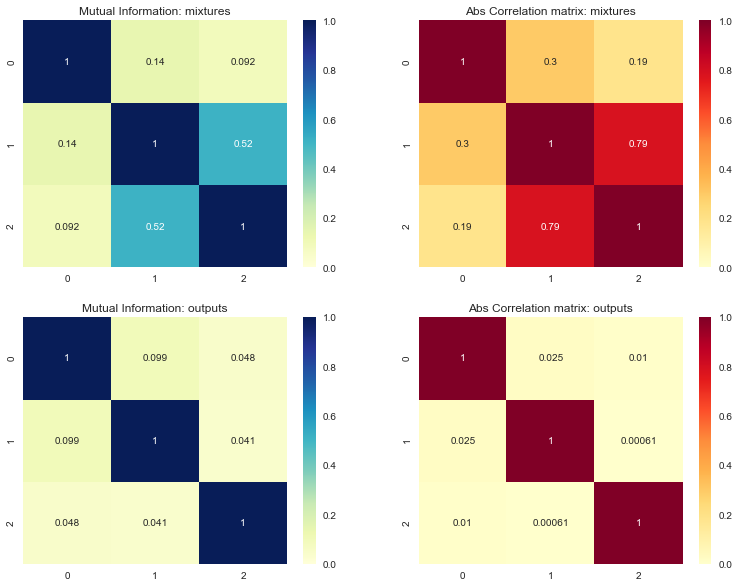

In [22]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures[-1000:], y = yNPCA[-1000:], KDE = False)

## Chichocki-Unbehauen Algorithm Feedback network

In [23]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, runs  = 1) 

Execution time: 10.232627630233765 seconds


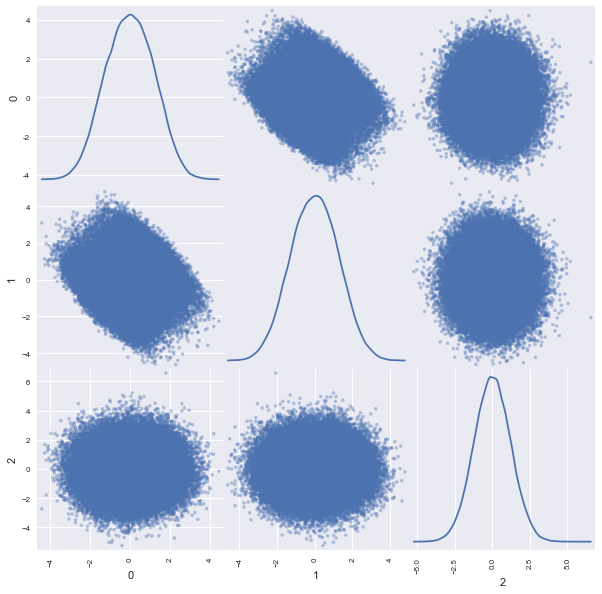

In [24]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.0891,0.9985,8.0748e-27
1,0,0.189,0.9994,4.6081e-17
2,0.1505,0.1748,1,0.49802


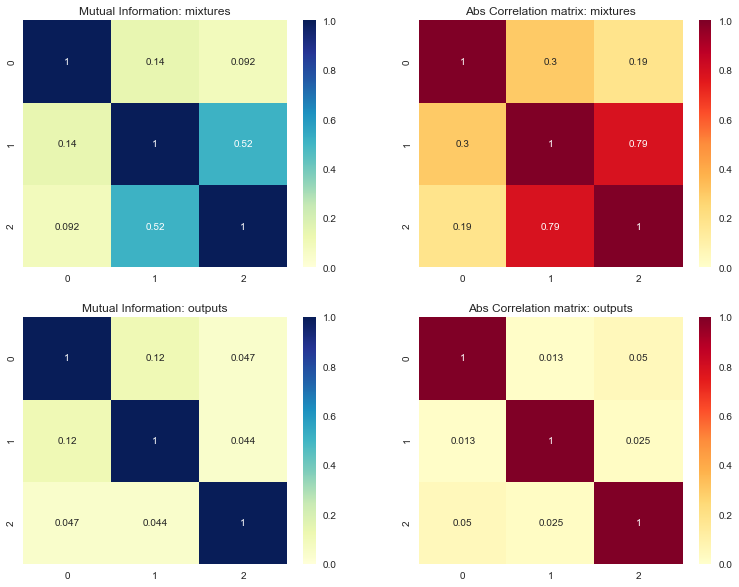

In [25]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures[-1000:], y = yFeedback[-1000:], KDE = False)

## Chichocki-Unbehauen Algorithm Feedforward network

In [26]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-9, runs = 1)

Execution time: 7.1968607902526855 seconds


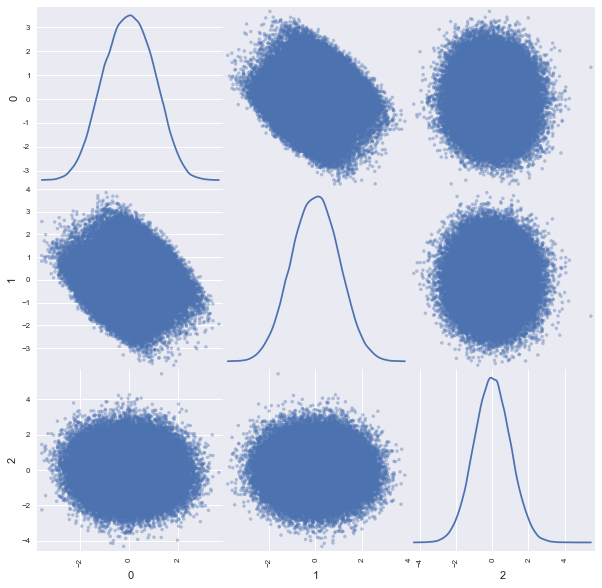

In [27]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.0442,0.9983,6.1826e-29
1,0,0.109,0.9996,1.1421e-13
2,0.1832,0.0572,1,0.53343


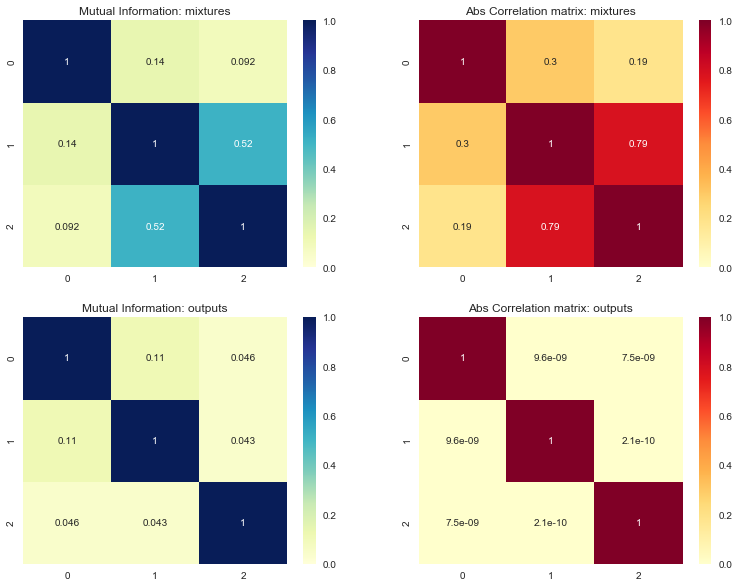

In [28]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures[-1000:], y = yFeedforward[-1000:], KDE = False)